In [62]:
import pandas as pd
import numpy as np

In [63]:
test = pd.read_csv('./data/comments.csv')
test=test.rename(columns = {'commentBody':'comments'})

In [64]:
test.shape

(930320, 4)

In [65]:

test['toxic'] = pd.Series(np.zeros(test.shape[0]))
test['severe_toxic'] = pd.Series(np.zeros(test.shape[0]))
test['obscene'] = pd.Series(np.zeros(test.shape[0]))
test['threat'] = pd.Series(np.zeros(test.shape[0]))
test['insult'] = pd.Series(np.zeros(test.shape[0]))
test['identity_hate'] = pd.Series(np.zeros(test.shape[0]))

In [66]:
test.head()

,commentID,comments,editorsSelection,recommendations,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,26156416.0,I typically strongly dislike articles which br...,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,25930059.0,I went to Cuba twice in 1998-9 to study Afro-C...,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,25912292.0,I don't think this is really all that new: I w...,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,25864174.0,I was in Salvador last month and got to see Di...,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,25855991.0,Why is it that men take it upon themselves to ...,0,12,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
test = test.drop_duplicates(subset=['comments'], keep='first')
test.shape

(914782, 10)

# NB_SVM training

In [68]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [69]:
train = pd.read_csv('./data/train.csv')

In [70]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train['none'] = 1-train[label_cols].max(axis=1)


In [71]:
train = train.rename(columns={'comment_text': 'comments'})

In [72]:
train.head()

,id,comments,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1


In [73]:
good = train[train['none'] == 1].iloc[:30000]

In [74]:
bad = train[train['none'] != 1]

In [75]:
train = pd.concat([bad, good], ignore_index=True)

In [76]:
d = [train['toxic'].mean(), train['severe_toxic'].mean(), train['obscene'].mean(), train['threat'].mean(),train['insult'].mean(), train['identity_hate'].mean(),train['none'].mean()]

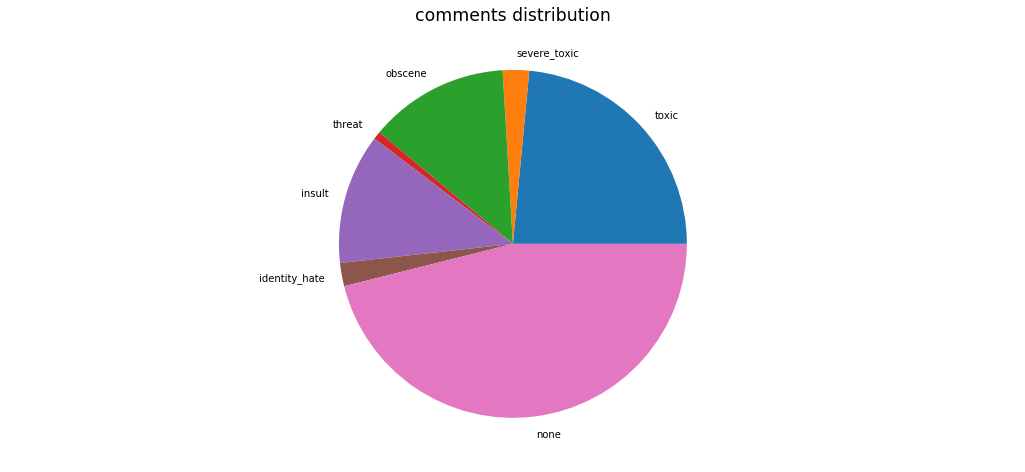

In [77]:
import matplotlib.pyplot as plt
plt.axis('equal')
#d = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
labels = 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'none'
plt.pie(d,labels=labels)
plt.title("comments distribution");

In [78]:
test.head()

,commentID,comments,editorsSelection,recommendations,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,26156416.0,I typically strongly dislike articles which br...,0,1,0.0,0.0,0.0,0.0,0.0,0.0
1,25930059.0,I went to Cuba twice in 1998-9 to study Afro-C...,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,25912292.0,I don't think this is really all that new: I w...,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,25864174.0,I was in Salvador last month and got to see Di...,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,25855991.0,Why is it that men take it upon themselves to ...,0,12,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
train['comments'].isnull().sum()
test['comments'].isnull().sum()

0

In [80]:
len(train)

46225

In [81]:
train.head()

,id,comments,toxic,severe_toxic,obscene,threat,insult,identity_hate,none
0,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0
1,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0,0
2,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0,0
3,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1,0
4,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0,0


# TfidfVectorizer

In [82]:
train.index

RangeIndex(start=0, stop=46225, step=1)

In [83]:
int(0.15*train.shape[0])

6933

In [84]:
np.random.seed(1024)

data_train=train.sample(frac=0.8,random_state=200)
data_validate=train.drop(data_train.index)

# Baseline 1

In [85]:
b1 = 1-data_validate['none'].mean()

# Baseline 2

## see logistic_reg for details

In [86]:
b2 = 0.541157382368848

# Method

In [87]:
data_train.to_csv("data_train.csv")
data_train = data_train.head(10000)
data_validate.to_csv("data_validate.csv")

In [88]:
# see logistic_reg.py

In [89]:
import re, string
re_tokenize = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')#!()-[]{};:'"\,<>./?@#$%^&*_~+#
def tokenize(s): 
    return re_tokenize.sub(r' \1 ', s).split()

In [90]:
n = data_train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(data_train['comments'])
test_term_doc = vec.transform(data_validate['comments'])

In [91]:
#basic naive bayes
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [92]:
x = trn_term_doc
test_x = test_term_doc

In [93]:
#Fit a model for one dependent at a time:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [94]:
preds = np.zeros((len(data_validate), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(data_train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit toxic


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


fit severe_toxic
fit obscene
fit threat
fit insult
fit identity_hate


In [95]:
re_df = pd.DataFrame({'id': data_validate["id"]})
result = pd.concat([re_df, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [96]:
result['none'] = 1-result[label_cols].max(axis=1)

In [97]:
m = len(result[result.none>0.5])/len(data_validate)

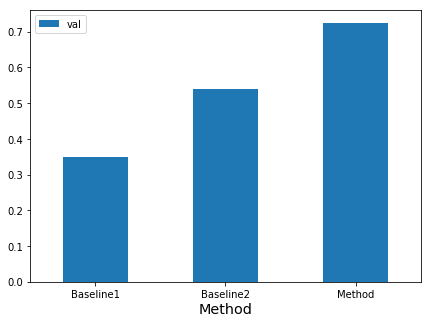

In [98]:
df = pd.DataFrame({'Method':['Baseline1', 'Baseline2', 'Method'], 'val':[b1,b2,m]})
ax = df.plot.bar(x='Method', y='val', rot=0,figsize=(7,5))


# predicts

In [99]:
import re, string
re_tokenize = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): 
    return re_tokenize.sub(r' \1 ', s).split()

In [100]:
n = train.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
trn_term_doc = vec.fit_transform(train['comments'])
test_term_doc = vec.transform(test['comments'])

In [101]:
#basic naive bayes
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [102]:
x = trn_term_doc
test_x = test_term_doc

In [103]:
#Fit a model for one dependent at a time:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

In [104]:
preds = np.zeros((len(test), len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(train[j])
    preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

fit toxic
fit severe_toxic
fit obscene
fit threat


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fit insult
fit identity_hate


C:\Users\hyh6hhy\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [105]:
re_df = pd.DataFrame({'id': test["commentID"]})
result = pd.concat([re_df, pd.DataFrame(preds, columns = label_cols)], axis=1)

In [106]:
result =result.dropna()

In [107]:
result.tail()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
914777,26926256.0,0.043469,0.000766,0.012941,0.000382,0.020188,0.002055
914778,26927219.0,0.096852,0.002430,0.021237,0.000496,0.023575,0.002181
914779,26928314.0,0.093012,0.003543,0.022392,0.000822,0.033914,0.005966
914780,26926339.0,0.031942,0.001485,0.012622,0.000510,0.012866,0.002083
914781,26928005.0,0.383585,0.007548,0.054736,0.001176,0.042578,0.003621


In [108]:
#result=result.rename(columns = {'none':'courtesy'})

In [109]:
result['courtesy'] = 1-result[label_cols].max(axis=1)

In [110]:
result.tail()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,courtesy
914777,26926256.0,0.043469,0.000766,0.012941,0.000382,0.020188,0.002055,0.956531
914778,26927219.0,0.096852,0.002430,0.021237,0.000496,0.023575,0.002181,0.903148
914779,26928314.0,0.093012,0.003543,0.022392,0.000822,0.033914,0.005966,0.906988
914780,26926339.0,0.031942,0.001485,0.012622,0.000510,0.012866,0.002083,0.968058
914781,26928005.0,0.383585,0.007548,0.054736,0.001176,0.042578,0.003621,0.616415


In [111]:
#test[test.id == 26852795.0].comments

In [112]:
result.courtesy

0         0.896304
1         0.916215
2         0.959547
3         0.916562
4         0.739008
5         0.027471
6         0.962999
7         0.920502
8         0.916811
9         0.503915
10        0.680185
11        0.935823
12        0.963176
13        0.955589
14        0.917865
15        0.737328
16        0.900165
17        0.964173
18        0.940048
19        0.978721
20        0.855856
21        0.936717
22        0.894207
23        0.936478
24        0.553968
25        0.949621
26        0.971078
27        0.929281
28        0.747004
29        0.925949
            ...   
914752    0.953354
914753    0.892713
914754    0.736718
914755    0.937854
914756    0.960632
914757    0.869619
914758    0.807673
914759    0.824084
914760    0.816321
914761    0.960398
914762    0.947647
914763    0.798654
914764    0.795728
914765    0.964237
914766    0.909789
914767    0.966673
914768    0.974405
914769    0.885700
914770    0.900254
914771    0.940297
914772    0.941202
914773    0.

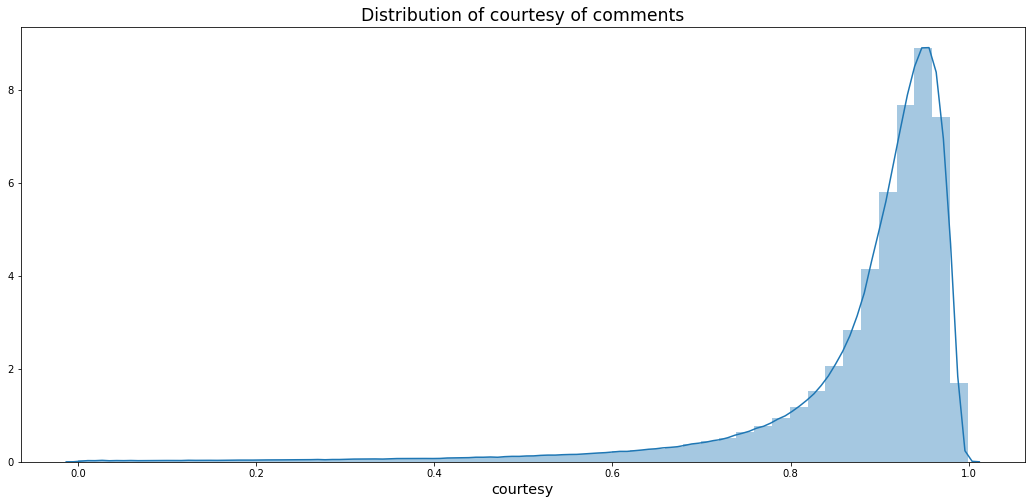

In [113]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(result.courtesy);
plt.title("Distribution of courtesy of comments");

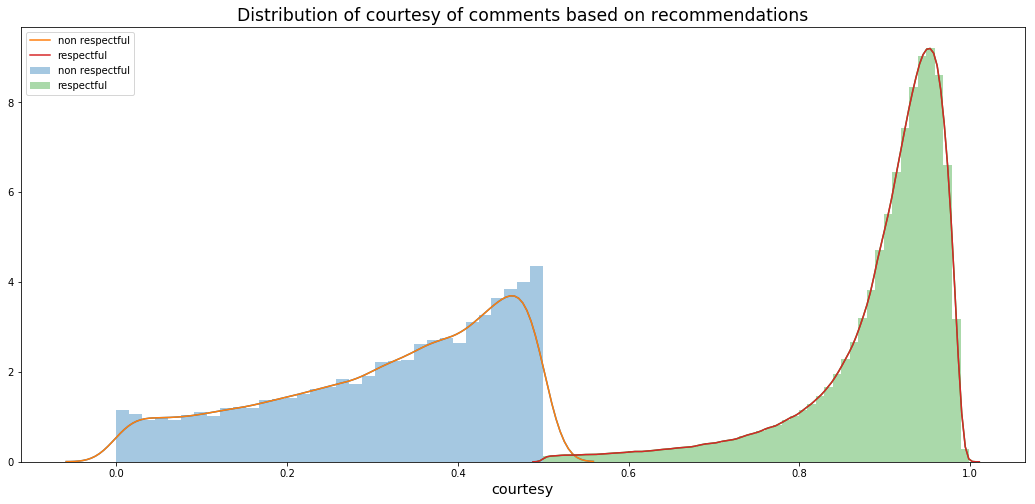

In [114]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
sns.distplot(result.loc[result.courtesy< 0.5, 'courtesy'], ax=ax, label= "non respectful");
sns.kdeplot(result.loc[result.courtesy< 0.5, 'courtesy'], ax=ax, label = "non respectful");
sns.distplot(result.loc[result.courtesy> 0.5, 'courtesy'], ax=ax, label= "respectful");
sns.kdeplot(result.loc[result.courtesy> 0.5, 'courtesy'], ax=ax, label = "respectful");
plt.title("Distribution of courtesy of comments based on recommendations");
ax.legend(loc='upper left');

In [115]:
result.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,courtesy
0,26156416.0,0.103696,0.000641,0.027915,0.000663,0.016484,0.011320,0.896304
1,25930059.0,0.083785,0.000674,0.020280,0.000986,0.022702,0.005076,0.916215
2,25912292.0,0.040453,0.001460,0.020414,0.000292,0.009171,0.001573,0.959547
3,25864174.0,0.083438,0.002270,0.034150,0.000760,0.044042,0.002164,0.916562
4,25855991.0,0.260992,0.002513,0.015649,0.001295,0.017925,0.004073,0.739008


In [116]:
test.columns

Index(['commentID', 'comments', 'editorsSelection', 'recommendations', 'toxic',
       'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
      dtype='object')

In [117]:
column2 = ['commentID', 'editorsSelection', 'recommendations']
df2 = test[column2]
results2 = result.merge(df2, how='left', left_on='id', right_on='commentID')

In [118]:
results2.head()


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,courtesy,commentID,editorsSelection,recommendations
0,26156416.0,0.103696,0.000641,0.027915,0.000663,0.016484,0.011320,0.896304,26156416.0,0,1
1,25930059.0,0.083785,0.000674,0.020280,0.000986,0.022702,0.005076,0.916215,25930059.0,0,0
2,25912292.0,0.040453,0.001460,0.020414,0.000292,0.009171,0.001573,0.959547,25912292.0,0,1
3,25864174.0,0.083438,0.002270,0.034150,0.000760,0.044042,0.002164,0.916562,25864174.0,0,0
4,25855991.0,0.260992,0.002513,0.015649,0.001295,0.017925,0.004073,0.739008,25855991.0,0,12


In [119]:
results2.describe()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,courtesy,commentID,editorsSelection,recommendations
count,8.993250e+05,899325.000000,899325.000000,899325.000000,899325.000000,899325.000000,899325.000000,899325.000000,8.993250e+05,899325.000000,899325.000000
mean,2.619506e+07,0.118896,0.002108,0.022414,0.000952,0.034381,0.004551,0.880713,2.619506e+07,0.016344,18.293086
std,4.407062e+05,0.127324,0.002453,0.016919,0.005878,0.038999,0.011860,0.127410,4.407062e+05,0.126797,87.246363
min,2.538917e+07,0.000082,0.000152,0.000426,0.000068,0.000667,0.000051,0.000003,2.538917e+07,0.000000,0.000000
25%,2.582852e+07,0.048572,0.001241,0.014718,0.000419,0.018035,0.002003,0.865942,2.582852e+07,0.000000,1.000000
50%,2.622031e+07,0.079124,0.001689,0.019039,0.000540,0.025367,0.002834,0.920656,2.622031e+07,0.000000,4.000000
75%,2.657805e+07,0.133745,0.002377,0.025348,0.000810,0.037769,0.004445,0.951179,2.657805e+07,0.000000,10.000000
max,2.693989e+07,0.999997,0.781237,0.999435,0.998339,0.999434,0.995961,0.998749,2.693989e+07,1.000000,8713.000000


In [120]:
results2.sort_values("editorsSelection", axis = 0, ascending = False, inplace = True) 
results2.head(50)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,courtesy,commentID,editorsSelection,recommendations
505372,26346130.0,0.299220,0.002703,0.026045,0.001600,0.066459,0.002869,0.700780,26346130.0,1,7
130085,25516664.0,0.087168,0.001570,0.024485,0.000675,0.024520,0.003421,0.912832,25516664.0,1,115
327233,25991772.0,0.093826,0.003017,0.014019,0.002924,0.018161,0.003312,0.906174,25991772.0,1,581
721271,26720627.0,0.324536,0.001836,0.034337,0.000385,0.063871,0.002569,0.675464,26720627.0,1,2944
304407,25951531.0,0.099989,0.002688,0.030995,0.001023,0.027054,0.004237,0.900011,25951531.0,1,47
555584,26471988.0,0.057783,0.001967,0.020861,0.000416,0.026281,0.000532,0.942217,26471988.0,1,27
521957,26375784.0,0.040891,0.000847,0.011648,0.000568,0.018200,0.003023,0.959109,26375784.0,1,116
361512,26150656.0,0.036326,0.000861,0.025666,0.000678,0.015906,0.002607,0.963674,26150656.0,1,53
304413,25951352.0,0.032307,0.001482,0.010210,0.000410,0.007078,0.001895,0.967693,25951352.0,1,39
180688,25425168.0,0.100752,0.001174,0.018796,0.000514,0.035020,0.001199,0.899248,25425168.0,1,5


In [121]:
#results2 = results2[results2['courtesy']< 0.6]

C:\Users\hyh6hhy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


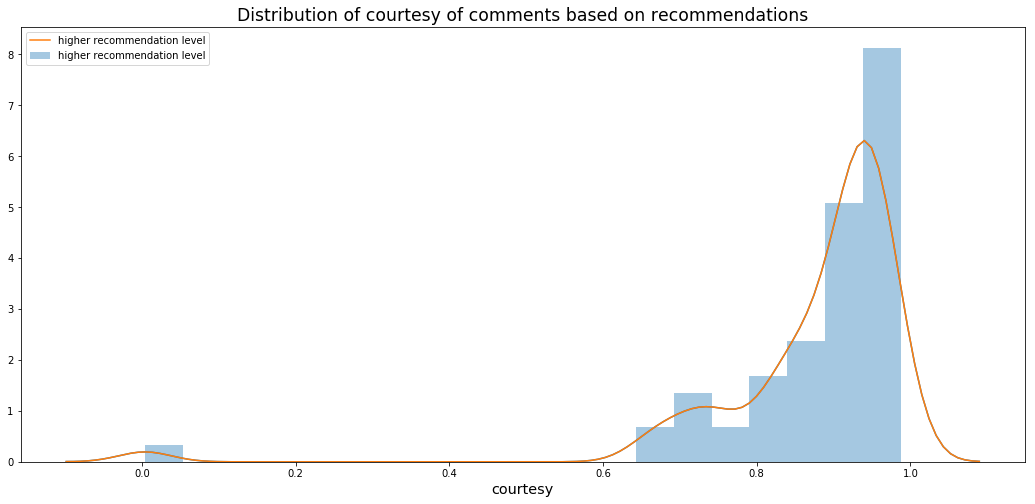

In [122]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
#sns.distplot(results2.loc[results2.recommendations < 10 , 'courtesy'], ax=ax, label= "non respectful");
#sns.kdeplot(results2.loc[results2.recommendations <10, 'courtesy'], ax=ax, label = "non respectful");
sns.distplot(results2.loc[results2.recommendations >3000, 'courtesy'], ax=ax, label= "higher recommendation level");
sns.kdeplot(results2.loc[results2.recommendations >3000, 'courtesy'], ax=ax, label = "higher recommendation level");
plt.title("Distribution of courtesy of comments based on recommendations");
ax.legend(loc='upper left');

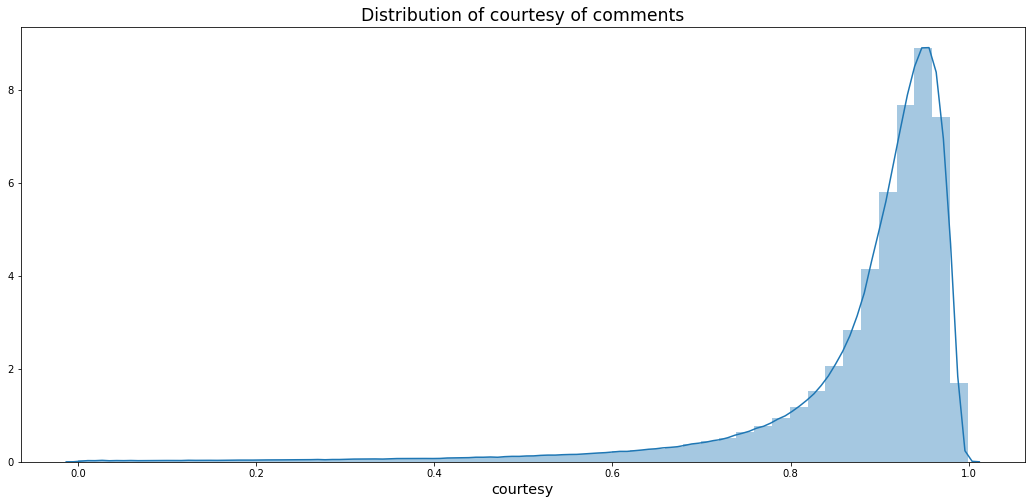

In [123]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
sns.distplot(results2.courtesy);
plt.title("Distribution of courtesy of comments");

In [124]:
results2.editorsSelection.value_counts()

0    884626
1     14699
Name: editorsSelection, dtype: int64

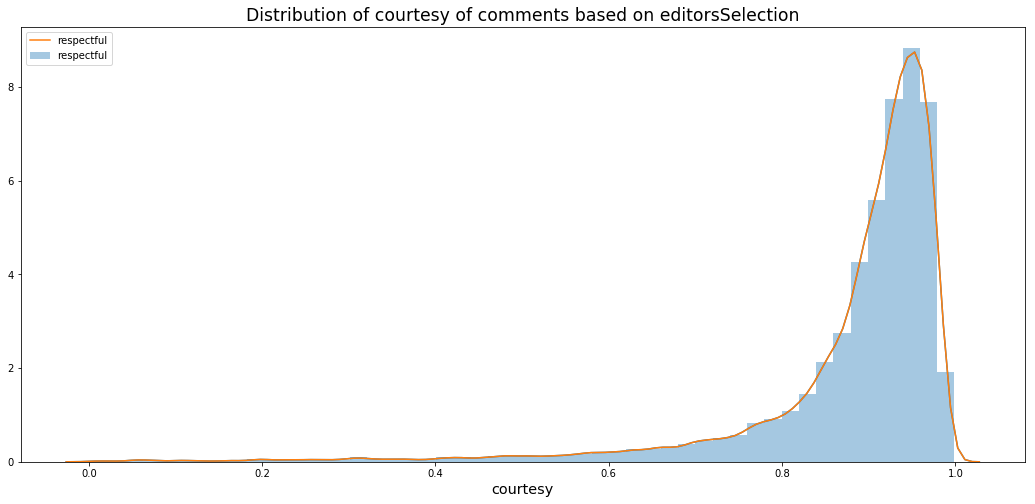

In [125]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (18, 8)
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['axes.labelsize'] = 'x-large'
fig, ax = plt.subplots()
#sns.distplot(results2.loc[results2.editorsSelection == 0 , 'courtesy'], ax=ax, label= "non respectful");
#sns.kdeplot(results2.loc[results2.editorsSelection == 0, 'courtesy'], ax=ax, label = "non respectful");
sns.distplot(results2.loc[results2.editorsSelection ==1, 'courtesy'], ax=ax, label= "respectful");
sns.kdeplot(results2.loc[results2.editorsSelection ==1, 'courtesy'], ax=ax, label = "respectful");
plt.title("Distribution of courtesy of comments based on editorsSelection");
ax.legend(loc='upper left');